**Azalea Yunus and Benji Andrews**

Fall 2020

CS 343: Neural Networks

Project 2: Multi-layer Perceptrons

In [13]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# for obtaining the STL-dataset
import load_stl10_dataset

# for preprocessing dataset
import preprocess_data

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

completeted iteration 800 /6000, loss of 28.003310860815166
completeted iteration 1200 /4800, loss of 21.147493715797957
completeted iteration 1200 /4800, loss of 14.500701783445205
completeted iteration 5600 /6000, loss of 5.501849423014773
completeted iteration 1200 /4800, loss of 25.674694601759033
completeted iteration 800 /6000, loss of 15.207520036871443
completeted iteration 1200 /4800, loss of 23.345746506090695
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 2: Implement single layer network to test softmax activation and cross-entropy loss

You will first implement and test out the softmax activation and cross-entropy loss in a single layer net before embedding it in a more complex multi-layer network.

### 2a. Load in preprocessed STL-10 data

Use your automated preprocessing function to load in the STL-10 data in the following split:
- 3500 training samples
- 500 test samples
- 500 validation samples
- 500 samples for development

Assign the LAST 15 images in the dev set to a variable called `test_imgs` and the LAST 15 classes in the dev set to `test_labels`. These are the variable names assumed for the test code below.

In [14]:
random.seed(0)
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10()
test_imgs = x_dev[-15:,:]
test_labels = y_dev[-15:]
print("shape test imgs", test_imgs.shape)
print("shape test labels", test_labels.shape)

completeted iteration 800 /6000, loss of 9.419439362497585
completeted iteration 800 /6000, loss of 20.370358156503237
completeted iteration 5600 /6000, loss of 2.986305740137298
completeted iteration 5600 /6000, loss of 3.357612844054355
Found cached numpy arrays the images and labels. Loading them...
Images are: (5000, 32, 32, 3)
Labels are: (5000,)
shape test imgs (15, 3072)
shape test labels (15,)


### 2b. Implement the following functions

In `softmax_layer.py`, implement the following methods in the base class `SoftmaxLayer`:

- `fit`
- `net_in`
- `predict`
- `one_hot`
- `accuracy`
- `activation` (softmax) $f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^C e^{x_j}}$ where $x_i$ are the "net in" values and there are $C$ output neurons (one per input class). $f(x_i)$ is the activation values of each output neuron $i$. Since this is softmax, it is the probability that a given input belongs to the class $i$ coded by the output neuron.
- `loss` (cross-entropy) $L(x_m) = -\frac{1}{B}\sum_{b=1}^B{Log \left (\frac{e^{x_m}}{\sum_{n=1}^C e^{x_n}}\right )}$. $m$ is the correct class for the $b^{th}$ input. $x_m$ is the output neuron activation for the correct class, $x_n$ is the output neuron activation for all of the classes (in the sum). The batch size is $B$, so the loss is averaged over each mini-batch of inputs. The expression in the $Log$ is just the softmax.
- `gradient` (for softmax/cross-entropy)

You're welcome to work in any order, but I recommend starting with `fit` because as you work though it, you should recognize why we need most of the other methods. You can finish `fit` or branch off as you need the other methods.

### 2c. Test key functions

In [15]:
from softmax_layer import SoftmaxLayer

completeted iteration 5700 /6000, loss of 3.7787547795963716
completeted iteration 5600 /6000, loss of 2.7258905279188195


In [4]:
# Let's generate some small Gaussian weights equal to the length of an image feature vector
np.random.seed(0)
randWts = np.random.normal(loc=0, scale=0.01, size=(x_dev.shape[1], 10))
b = 1
softmaxNet = SoftmaxLayer(-1)

#### Test the `onehot` function

In [5]:
y_test1 = np.array([2, 2, 0, 1])
c_test = 4
y_one_hot = softmaxNet.one_hot(y_test1, c_test)
print(f'Your one hot vectors:\n{y_one_hot}')

Your one hot vectors:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


Your one hot vectors should look like:

    [[0. 0. 1. 0.]
     [0. 0. 1. 0.]
     [1. 0. 0. 0.]
     [0. 1. 0. 0.]]

#### Test the `loss`,  `net_in`, softmax `activation` functions

In [6]:

lossNoReg, lossReg = softmaxNet.test_loss(randWts, b, test_imgs, test_labels)
print(f'The loss (without regularization) is {lossNoReg:.2f} and it should approx be 2.28')
print(f'The loss (with 0.5 regularization) is {lossReg:.2f} and it should approx be 3.03')

net in shape=(15, 10), min=0.7160773059462711, max=1.4072103751494875
Should be
net in shape=(15, 10), min=0.7160773059462714, max=1.4072103751494884

net act shape=(15, 10), min=0.07322406412627334, max=0.1433135816597887
Should be
net act shape=(15, 10), min=0.0732240641262733, max=0.1433135816597887

The loss (without regularization) is 2.28 and it should approx be 2.28
The loss (with 0.5 regularization) is 3.03 and it should approx be 3.03


#### Test the `gradient` function

In [7]:
grad_wts, grad_b = softmaxNet.test_gradient(randWts, b, test_imgs, test_labels, 10)
print()
print(f'1st few Wt gradient values are {grad_wts[:4,0]}\nand should be                  [0.01  0.015 0.014 0.009] ')
print(f'1st few Wt bias values are {grad_b[:4]}\nand should be              [ 0.101 -0.098  0.102 -0.026]')

net in: (15, 10), 0.7160773059462711, 1.4072103751494875
net in 1st few values of 1st input are: [1.05  0.845 1.13  1.228 0.969]
net act 1st few values of 1st input are: [0.105 0.085 0.114 0.125 0.097]
y one hot: (15, 10), sum is 15.0

1st few Wt gradient values are [0.01  0.015 0.014 0.009]
and should be                  [0.01  0.015 0.014 0.009] 
1st few Wt bias values are [ 0.101 -0.098  0.102 -0.026]
and should be              [ 0.101 -0.098  0.102 -0.026]


#### Test `fit` function

In [8]:
random.seed(0)
softmaxNet = SoftmaxLayer(10)
loss_history = softmaxNet.fit(x_dev, y_dev, n_epochs=600, verbose=1, mini_batch_sz=250)

completeted iteration 0 /1200, loss of 2.31494700152127
completeted iteration 100 /1200, loss of 2.3112308437152698
completeted iteration 200 /1200, loss of 2.284744989335392
completeted iteration 300 /1200, loss of 2.263823848160114
completeted iteration 400 /1200, loss of 2.265420051428712
completeted iteration 500 /1200, loss of 2.2436900472935033
completeted iteration 600 /1200, loss of 2.2343374761652375
completeted iteration 700 /1200, loss of 2.210493033744264
completeted iteration 800 /1200, loss of 2.193366764557454
completeted iteration 900 /1200, loss of 2.1949382752342936
completeted iteration 1000 /1200, loss of 2.1849586140206045
completeted iteration 1100 /1200, loss of 2.1637255523489514


Given the random mini-batch sampling process, you may get different specific numbers, but the loss should generally decrease over iterations. You should get something like this:
            
         Starting to train network, There will be 600 epochs and 
             1200 iterations total, 2 iter/epoch.
         Completed iter 0/1200. Training loss: 2.32
         Completed iter 100/1200. Training loss: 2.28
         Completed iter 200/1200. Training loss: 2.29
         Completed iter 300/1200. Training loss: 2.27
         Completed iter 400/1200. Training loss: 2.26
         Completed iter 500/1200. Training loss: 2.25
         Completed iter 600/1200. Training loss: 2.23
         Completed iter 700/1200. Training loss: 2.21
         Completed iter 800/1200. Training loss: 2.19
         Completed iter 900/1200. Training loss: 2.18
         Completed iter 1000/1200. Training loss: 2.19
         Completed iter 1100/1200. Training loss: 2.20
         Finished training!

##### Plot the loss

It should look noisy, but decrease and look linear on average.

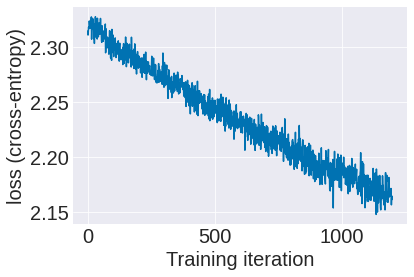

In [9]:
def plot_cross_entropy_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Training iteration')
    plt.ylabel('loss (cross-entropy)')
    plt.show()
    
plot_cross_entropy_loss(loss_history)

### 2d. Questions

**Question 1.** What do you think the linear drop in loss over the epochs tells us about the state of the training process? How is current training going? What's the future potential like?

**Question 2.** Below, write code to test regularization with training: check to make sure that the loss starts at around 154-158 for `reg=100`. Once you get this working, play around with the regularization parameter. You can drastically change the magnitude, but it should always remain nonnegative. How does regularization affect the training loss and **why**?

**Question 3.** Play around with the batch size parameter. How does this affect the training loss and **why**? (*Think about the error gradient and how the weights change*)

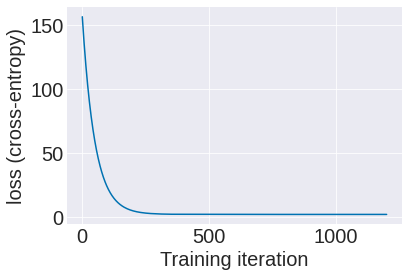

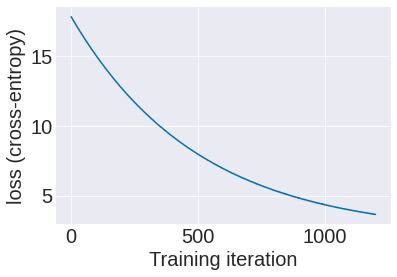

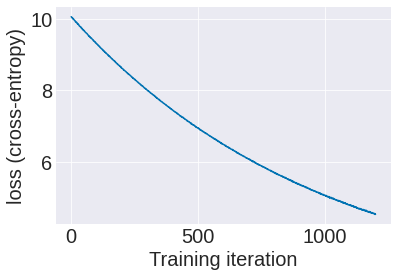

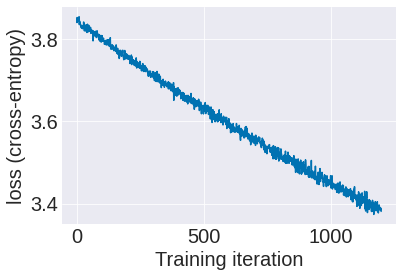

In [10]:
random.seed(0)
#test code for regularization variance
softmaxNet = SoftmaxLayer(10)

loss_history_100 = softmaxNet.fit(x_dev, y_dev, n_epochs=600, verbose=0, mini_batch_sz=250, reg=100)
loss_history_10 = softmaxNet.fit(x_dev, y_dev, n_epochs=600, verbose=0, mini_batch_sz=250, reg=10)
loss_history_5 = softmaxNet.fit(x_dev, y_dev, n_epochs=600, verbose=0, mini_batch_sz=250, reg=5)
loss_history_1 = softmaxNet.fit(x_dev, y_dev, n_epochs=600, verbose=0, mini_batch_sz=250, reg=1)
plot_cross_entropy_loss(loss_history_100)
plot_cross_entropy_loss(loss_history_10)
plot_cross_entropy_loss(loss_history_5)
plot_cross_entropy_loss(loss_history_1)

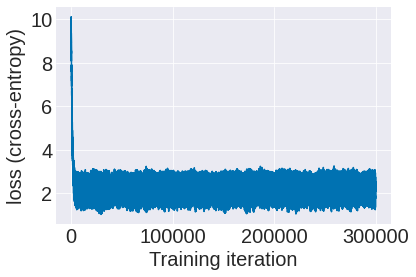

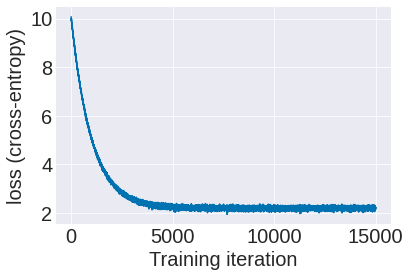

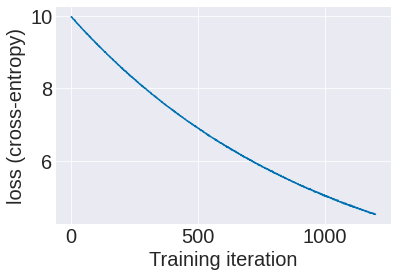

In [11]:
#test code for batch size variance
loss_history_batch_test_a = softmaxNet.fit(x_dev, y_dev, n_epochs=600, verbose=0, mini_batch_sz=1, reg=5)
plot_cross_entropy_loss(loss_history_batch_test_a)

loss_history_batch_test_b = softmaxNet.fit(x_dev, y_dev, n_epochs=600, verbose=0, mini_batch_sz=20, reg=5)
plot_cross_entropy_loss(loss_history_batch_test_b)

loss_history_batch_test_c = softmaxNet.fit(x_dev, y_dev, n_epochs=600, verbose=0, mini_batch_sz=250, reg=5)
plot_cross_entropy_loss(loss_history_batch_test_c)


**Answer 1:** The linear drop in loss over epochs tells us that we are still getting improvements when doing another epoch. This means the net is underfit, and we should probably ontinue training for a while to get the minimum loss. The opposite of this output would be if loss was approaching a value and getting closer to that value with each epoch, instead of linear improvement.

**Answer 2:** Generally speaking, a higher regularization parameter increases the loss during training. This is because regularization penalizes weights that are significantly different than the others with a higher loss value. In doing this, minimizing the loss as we go through the iterations makes the loss curve uniform.

**Answer 3:** The higher the batch size, the longer it takes for the loss to converge. This makes sense, as when fewer weights are being updated per iteration, a smaller step in loss will be taken during that iteration. 

### 2e. Train and optimize STL-10 dataset performance

As you've surely noticed, hyperparameters can drastically affect learning! 


Implement a grid search for the best hyperparameters

- learning rate,
- regularization
- batch size 

The grid search process should:

1. Fit the model with specific values of hyperparameters that we're testing (using the training set).
2. Compute the accuracy on the training set. 
3. Compute the accuracy on the validation set. 
4. Print out and record the best parameter combination as you go (that improves the **validation set accuracy**).
5. Wipe the weights clean (reinitialize them) every time you try new parameters. It's easiest just to create a new net object on each run.

#### Suggestions

This can take quite a bit of simulation time! Here are some tips:
- I suggest using a coarse-to-fine search strategy. First try varying parameters over many orders of magnitude. Use the "new best" print outs to refine the ranges that you test. Abort simulations prematurely if you feel there aren't productive (no reason to wait!). This can take however long or short that you want to dedicate. Remember, you are printing out the best parameter values on each run, so you can just proceed with those.
- You should be able to achieve ~30% accuracy without too much effort (10% is chance performance).
- High learning rates don't really make sense. You'll know if your value is "high" if numpy complains about numerical issues.
- Your mini-batch sizes should be <= N and >= 1.
- Time single network runs with a few different batch sizes you plan on trying in your big search. This will help you figure out a ballpark estimate how long grid search will take (*you can decide whether to go eat dinner, run it overnight, etc.*). If it will take an unreasonable amount of time, reduce the number of parameters you try in one search.


**Important note:** Like usual, I am not grading based on your performance numbers or the number of hours your computer spends searching. I want to see that you successfully implemented the grid search to find progressively better hyperparameters on STL-10 and use the outcome to inform your ultimate training session that you use to evaluate predictions on the test set.

In [13]:
#original base code version of grid search


random.seed(0)
tic = time.time() 

#set ranges
lr_coarse = np.geomspace(0.0001, 0.01, num=2)
batch_coarse = np.linspace(50, 100, num=2, dtype="int")
reg_coarse = np.linspace(5, 50, num=2, dtype="int")




best_acc = 0
count = 0
for lr in lr_coarse:
    for batch in batch_coarse:
        for reg in reg_coarse:
            softmaxNet = SoftmaxLayer(10)
            loss_history = softmaxNet.fit(x_train, y_train, n_epochs=100, verbose=0, mini_batch_sz=batch, reg=reg, lr=lr)
            train_acc = softmaxNet.accuracy(y_dev,softmaxNet.predict(x_dev))
            val_acc = softmaxNet.accuracy(y_val,softmaxNet.predict(x_val))
            print("run ", count)
            count+=1
            if val_acc > best_acc:
                best_acc = val_acc
                print(f"found a new best accuracy on validation set.\n validation set accuracy = {val_acc} ")
                print(f"hyperparameters: \n LR = {lr} \n batch size = {batch} \n reg = {reg}")
                
                
                
                
toc = time.time()

print(f"time was {toc-tic}")

run  0
found a new best accuracy on validation set.
 validation set accuracy = 0.292 
hyperparameters: 
 LR = 0.0001 
 batch size = 50 
 reg = 5
run  1
run  2
run  3


KeyboardInterrupt: 

In [39]:
#better, improved, multithreaded version of grid search

import time
import multiprocessing as mp
random.seed(0)

def grid_search(lr_range, batch_range, reg_range, num_threads=5):
    '''
    a function to perform a grid search, finding best hyperparameters to train the net with.
    lr_range/batch_range/reg_range: ndarray. length of each determines dimension of grid search.
        these are best as output of np.linspace or similar functions.
    num_threads: int
    '''
        
    tic = time.time()
    #set ranges

    #assign lists to each of the threads
    hyper_list = []
    for i in range(num_threads):
        hyper_list.append([])

    count=0
    for lr in lr_range:
        for batch in batch_range:
            for reg in reg_range:
                hyper_list[count%num_threads].append([lr,batch,reg])
                count+=1
    threadlist = []
    for i in range(num_threads):
        newT = mp.Process(target = train_thread, args = (i,hyper_list[i].copy()))
        newT.start()
        threadlist.append(newT)


    for thread in threadlist:
        thread.join()
    toc = time.time()

    print(f"time was {toc-tic}")
                     
def train_thread(net_id, queue):
    '''
    helper method grid search fn.
    net_id: int. an id for the net so you can tell the threads apart in printouts
    queue: python list of lists. each entry is a job to train the net on, format: [lr, batch size, reg]
    '''
    best_acc = 0
    count = 0
    for hyper_combo in queue:
        net = SoftmaxLayer(10)
        loss_history = net.fit(x_train, y_train, n_epochs=100, verbose=0, lr=hyper_combo[0], mini_batch_sz=hyper_combo[1], reg=hyper_combo[2])
        val_acc = net.accuracy(y_val, net.predict(x_val))
          
        if val_acc > best_acc:
            best_acc = val_acc
            print(f"net {net_id} found a new best acc1uracy on validation set.\n validation set accuracy = {val_acc} ")
            print(f"hyperparameters: \n LR = {hyper_combo[0]} \n batch size = {hyper_combo[1]} \n reg = {hyper_combo[2]}")
        print(f"net {net_id} finished run {count} ")
        count+=1
    print("-------------------------------------------------")                        
    print(f"NET {net_id} BEST OVERALL ACC: {best_acc}\n")    
    print(f"hyperparameters: \n LR = {hyper_combo[0]} \n batch size = {hyper_combo[1]} \n reg = {hyper_combo[2]}")
    print("-------------------------------------------------")                        

                                        
                                        








In [ ]:
lr_coarse = np.geomspace(0.0001, 0.01, num=4)
batch_coarse = np.linspace(50, 100, num=4, dtype="int")
reg_coarse = np.linspace(5, 50, num=4, dtype="int")

grid_search(lr_coarse, batch_coarse, reg_coarse)

In [40]:
lr_fine = np.geomspace(0.009, 0.05, num=4)
batch_fine = np.linspace(75, 100, num=4, dtype="int")
reg_fine = np.linspace(1, 10, num=4, dtype="int")

grid_search(lr_fine, batch_fine, reg_fine)

net 1 found a new best acc1uracy on validation set.
 validation set accuracy = 0.308 
hyperparameters: 
 LR = 0.008999999999999998 
 batch size = 75 
 reg = 4
net 1 finished run 0 
net 3 found a new best acc1uracy on validation set.
 validation set accuracy = 0.286 
hyperparameters: 
 LR = 0.008999999999999998 
 batch size = 75 
 reg = 10
net 3 finished run 0 
net 4 found a new best acc1uracy on validation set.
 validation set accuracy = 0.348 
hyperparameters: 
 LR = 0.008999999999999998 
 batch size = 83 
 reg = 1
net 4 finished run 0 
net 0 found a new best acc1uracy on validation set.
 validation set accuracy = 0.346 
hyperparameters: 
 LR = 0.008999999999999998 
 batch size = 75 
 reg = 1
net 0 finished run 0 
net 2 found a new best acc1uracy on validation set.
 validation set accuracy = 0.288 
hyperparameters: 
 LR = 0.008999999999999998 
 batch size = 75 
 reg = 7
net 2 finished run 0 
net 4 finished run 1 
net 3 found a new best acc1uracy on validation set.
 validation set accu

Process Process-42:
Process Process-41:
Process Process-43:
Process Process-45:


KeyboardInterrupt: 

Process Process-44:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "<ipython-input-39-a159b602d76a>", line 52, in train_thread
    loss_history = net.fit(x_train, y_train, n_epochs=100, verbose=0, lr=hyper_combo[0], mini_batch_sz=hyper_combo[1], reg=hyper_combo[2])
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most 

### 2f. Evaluate best model on test set

**Question 4:** Now that you have "good" parameter values recorded, train a new model with the best learning rate, regularization strength, and batch size values. What accuracy do you get on the test set?

**Answer 4:** Best accuracy achieved on the test set using the hyperparameters found in the grid search was ~29%

In [38]:
random.seed(0)
bestNet = SoftmaxLayer(10)
loss_history = bestNet.fit(x_train, y_train, n_epochs= 100, verbose=1, lr=0.04999, mini_batch_sz=100, reg=1)

test_acc = bestNet.accuracy(y_test, bestNet.predict(x_test))
print(f"test acc is {test_acc}")

completeted iteration 0 /3500, loss of 3.8329582051174267
completeted iteration 100 /3500, loss of 2.16835313716135
completeted iteration 200 /3500, loss of 2.1149066532892298
completeted iteration 300 /3500, loss of 2.042109832517965
completeted iteration 400 /3500, loss of 1.9674346825125046
completeted iteration 500 /3500, loss of 2.0415710509795475
completeted iteration 600 /3500, loss of 1.9853714404209284
completeted iteration 700 /3500, loss of 1.9800390611293368
completeted iteration 800 /3500, loss of 2.0681287559861463
completeted iteration 900 /3500, loss of 2.1063333825294235
completeted iteration 1000 /3500, loss of 2.05161948633147
completeted iteration 1100 /3500, loss of 1.9761883493430228
completeted iteration 1200 /3500, loss of 1.9520661257851812
completeted iteration 1300 /3500, loss of 2.0831008944660554
completeted iteration 1400 /3500, loss of 2.098141740650059
completeted iteration 1500 /3500, loss of 2.0209647882548714
completeted iteration 1600 /3500, loss of 

### 2g. Visualize learned weights

Run the following code that plots the network weights going to each output neuron. If all goes well, you should see something really cool! Include the plot in your submitted project to show me what you got!

**Note:** the quality of your visualizations will depend on:
- The quality of the hyperparameters that you got via grid search.
- How many epochs that you trained the network before plotting the weights

One extension idea: is to find the combination of the above that result in the best visualizations.

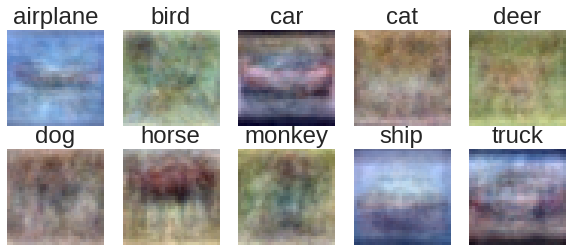

In [34]:
# Load in the class names
classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

# We don't care about the bias wt
wts = bestNet.wts
# Reshape the wt vectors into spatial 'image' configurations to visualization
wts = wts.reshape(32, 32, 3, 10)

# Make a large new empty figure/plot
plt.figure(figsize=(10, 4))

# Loop through each output neuron
for i in range(10):
  # Make a 2x5 grid of images
  plt.subplot(2, 5, i+1)
  
  # Rescale the weights to be between 0 and 255
  currImg = 255.0 * (wts[:, :, :, i].squeeze() - np.min(wts)) / (np.max(wts) - np.min(wts))
  
  plt.imshow(currImg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])